### Plotting Exercises
•	Weighting: 20%

•	Authorship: Individual

•	Lecturer setting the work: Dr Michael Kuhn

•	Submission deadline: 10 March 2024, 14:00

•	Target date for returning marked coursework: 28 March 2024

•	Number of hours you are expected to work on this assignment: 5



#### Submitted by: ORAJEKWE, Jerry Chukwuebuka 23031035

In [1]:
# importing the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pyarrow

### PROBLEM 1
Using matplotlib, plot the two points (x1,y1)=(3,5) and (x2,y2)=(7,2) and the line that passes through both points. The line must continue to the edges of the plot. (I.e., it is not just a line segment connecting the points.)
Your plot should demonstrate good style, as discussed in class, making it clear to read. 

In [2]:
# Define the points
x1, y1 = 3, 5
x2, y2 = 7, 2

# Define the equation of the line passing through the points
m = (y2 - y1) / (x2 - x1)
b = y1 - m * x1

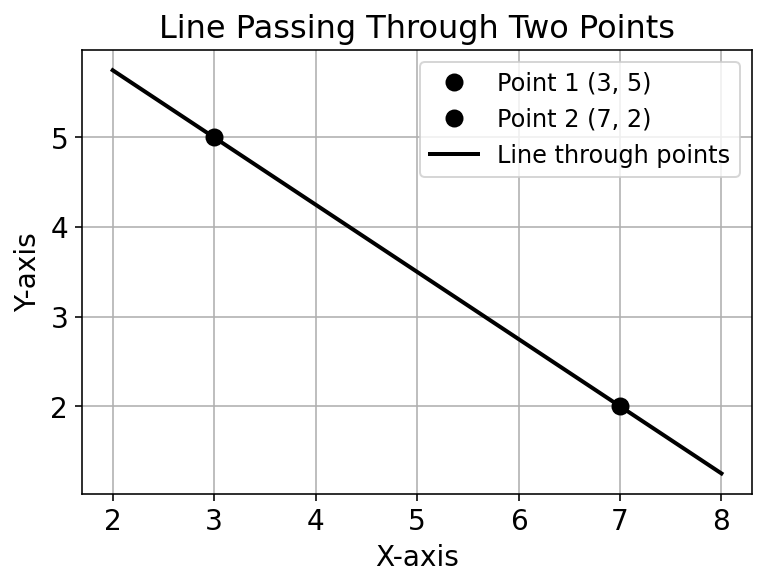

In [18]:
# Generate x values for the line extending beyond the points
x_min, x_max = min(x1, x2), max(x1, x2)
y_min, y_max = m * x_min + b, m * x_max + b

# Calculate corresponding y values for the line
x_line = [x_min - 1, x_max + 1]
y_line = [m * x + b for x in x_line]

# Set up the plot with a larger size and higher resolution (dpi)
plt.figure(figsize=(6, 4), dpi=144)

# Plot the points with increased marker size
plt.plot(x1, y1, 'ko', markersize=8, label='Point 1 (3, 5)')
plt.plot(x2, y2, 'ko', markersize=8, label='Point 2 (7, 2)')

# Plot the line with increased thickness
plt.plot(x_line, y_line, 'k-', linewidth=2, label='Line through points')

# Set axis labels and tick marks with larger font size
plt.xlabel('X-axis', fontsize=14)
plt.ylabel('Y-axis', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Add a title to the plot
plt.title('Line Passing Through Two Points', fontsize=16)

# Add a grid for better readability
plt.grid(True)

# Add a legend to the plot
plt.legend(fontsize=12)

# Display the plot
plt.show()

### PROBLEM 2
Load data from the following parquet file (URL below) into Python. Make nice plots presenting the data as fully as possible. 
I have deliberately not included more information about the content of the dataset or how best to present the data because this is up to you to figure out! You will be marked on your creativity and the appropriateness of your data presentation choices. To fully present the data, you may need to make multiple plots. 

In [4]:
# Load the data from the Parquet file
data = pd.read_parquet("https://star.herts.ac.uk/~kuhn/DHV/exercises_problem2.parquet")

# Display the first few rows of the DataFrame to understand its structure
print(data.head())

       var1      var2      var3  class
0  2.220386  3.088938  5.309324      1
1 -1.112359  1.838144  0.725785      0
2 -0.687695  1.747231  1.059535      0
3 -2.875016  1.718303 -1.156714      0
4 -2.010930  1.327895 -0.683035      0


In [5]:
# Display summary statistics of the data
summary_statistics = data.describe()
print(summary_statistics)

             var1        var2        var3       class
count  400.000000  400.000000  400.000000  400.000000
mean     3.469246    2.576392    6.045638    0.627500
std      3.811159    0.533500    4.219296    0.484076
min     -5.577154    0.444386   -5.132768    0.000000
25%      0.068847    2.346191    2.419225    0.000000
50%      4.968903    2.708548    7.961119    1.000000
75%      7.025826    2.951366    9.840901    1.000000
max      9.425215    3.471373   12.048517    1.000000


In [6]:
# Display information about the DataFrame, such as column names and data types
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   var1    400 non-null    float64
 1   var2    400 non-null    float64
 2   var3    400 non-null    float64
 3   class   400 non-null    int16  
dtypes: float64(3), int16(1)
memory usage: 10.3 KB
None


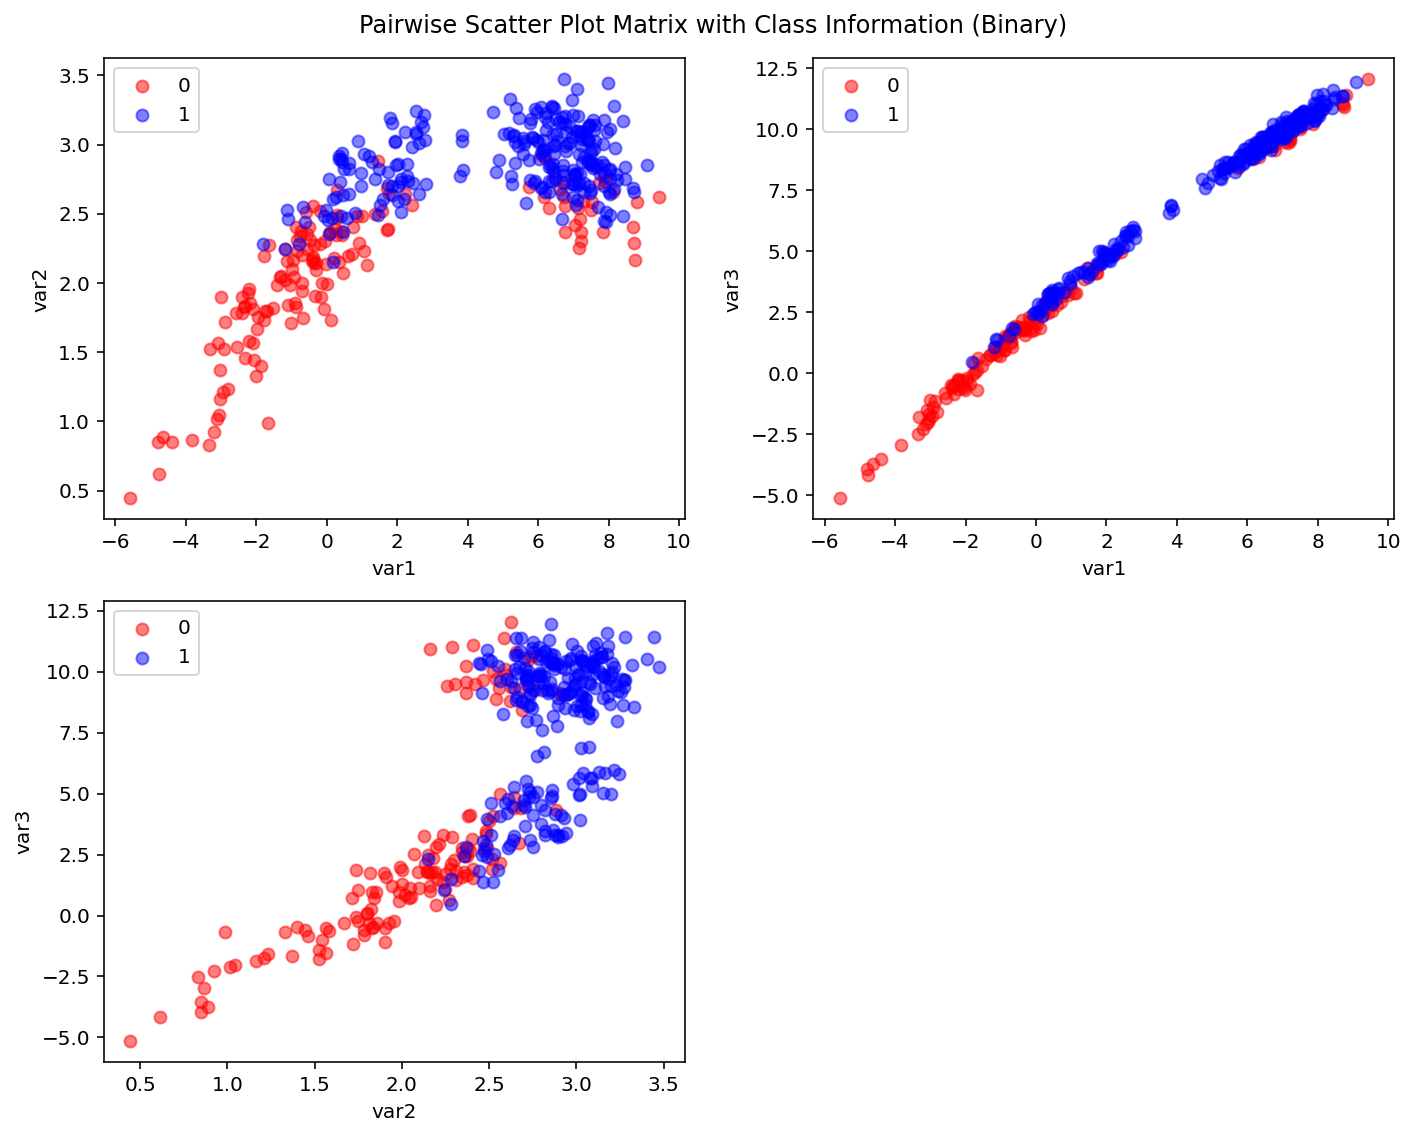

In [8]:
# Plot 1: Scatter plot matrix with different colors for each class

# Define colors for each class
class_colors = {0: 'red', 1: 'blue'}

# Set up the figure and specify its size and resolution
plt.figure(figsize=(10, 8), dpi=144)

# Subplot 1
plt.subplot(2, 2, 1)
# Loop over class labels and colors
for class_label, color in class_colors.items():
    # Scatter plot for the current class
    plt.scatter(data[data['class'] == class_label]['var1'], 
                data[data['class'] == class_label]['var2'], 
                alpha=0.5, color=color, label=str(class_label))
# Set labels for x and y axes
plt.xlabel('var1')
plt.ylabel('var2')
# Add legend to distinguish classes
plt.legend()

# Subplot 2
plt.subplot(2, 2, 2)
for class_label, color in class_colors.items():
    plt.scatter(data[data['class'] == class_label]['var1'], 
                data[data['class'] == class_label]['var3'], 
                alpha=0.5, color=color, label=str(class_label))
plt.xlabel('var1')
plt.ylabel('var3')
plt.legend()

# Subplot 3
plt.subplot(2, 2, 3)
for class_label, color in class_colors.items():
    plt.scatter(data[data['class'] == class_label]['var2'], 
                data[data['class'] == class_label]['var3'], 
                alpha=0.5, color=color, label=str(class_label))
plt.xlabel('var2')
plt.ylabel('var3')
plt.legend()

# Add a title to the entire figure
plt.suptitle('Pairwise Scatter Plot Matrix with Class Information (Binary)')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Display the plot
plt.show()

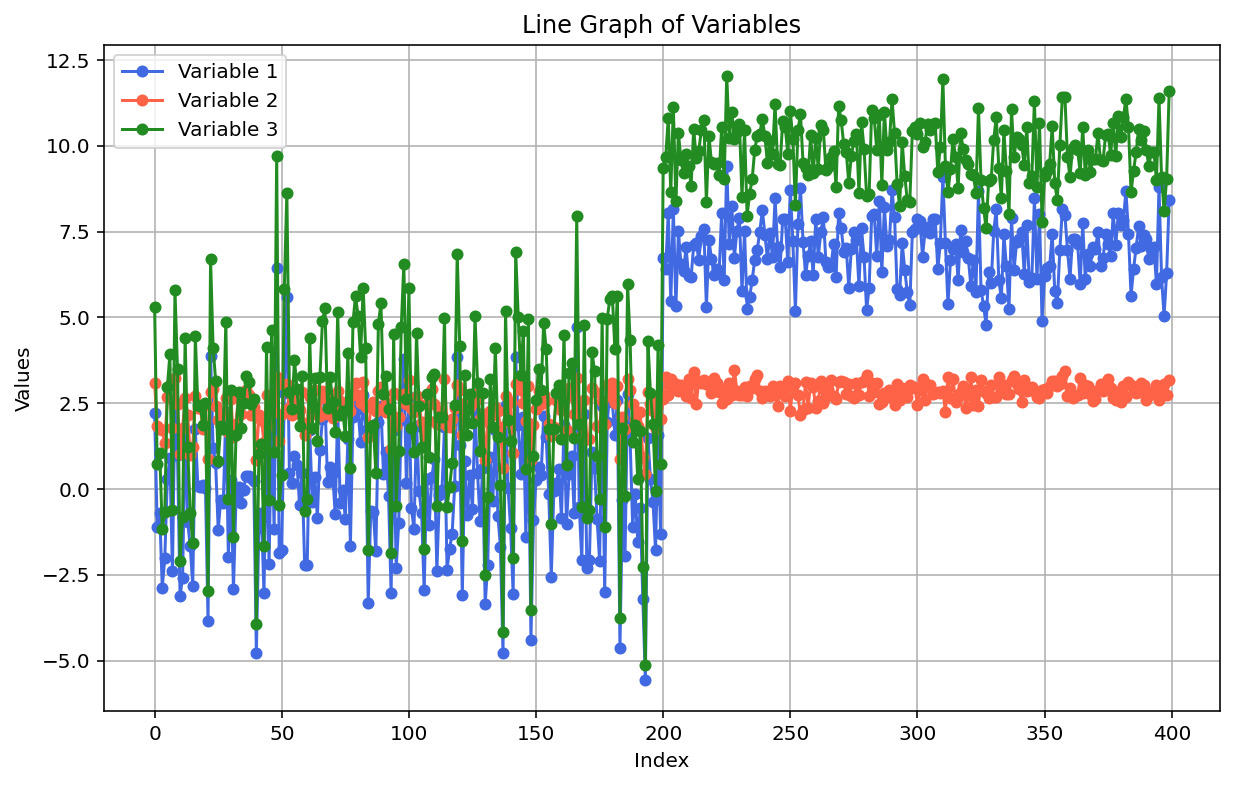

In [9]:
# Plot 2: Line graph of the variables at a glance

# Set up the figure and specify its size and resolution
plt.figure(figsize=(10, 6), dpi=144)

# Define colors for each variable
colors = ['royalblue', 'tomato', 'forestgreen']

# Plot a line graph for each variable
plt.plot(data['var1'], label='Variable 1', linestyle='-', marker='o', markersize=5, color=colors[0])
plt.plot(data['var2'], label='Variable 2', linestyle='-', marker='o', markersize=5, color=colors[1])
plt.plot(data['var3'], label='Variable 3', linestyle='-', marker='o', markersize=5, color=colors[2])

# Add title and labels
plt.title('Line Graph of Variables')
plt.xlabel('Index')  # Index represents the position of data points in the dataset
plt.ylabel('Values')  # Values represent the numerical values of each variable

# Add grid for better readability
plt.grid(True)

# Add legend to distinguish variables
plt.legend()

# Display the plot
plt.show()

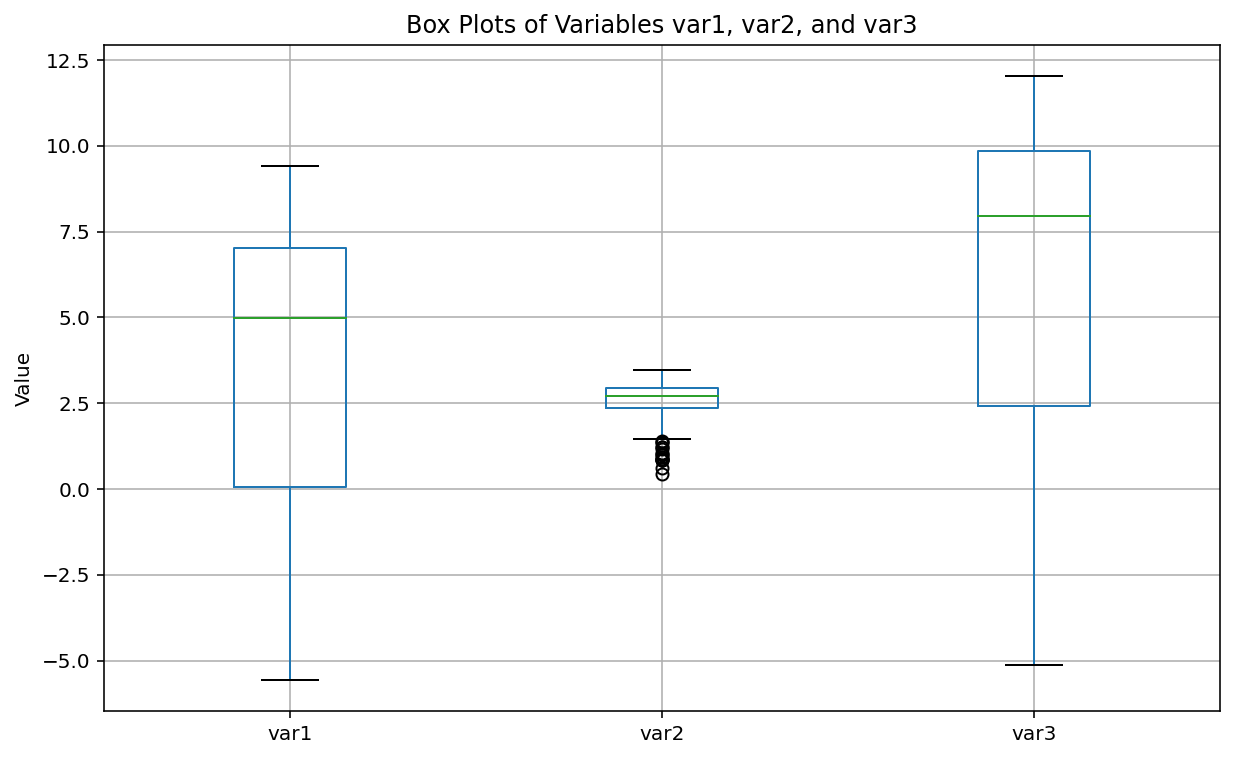

In [10]:
# Plot 3: Box Plots of the variables

# Set up the figure and specify its size and resolution
plt.figure(figsize=(10, 6), dpi=144)

# Create box plots for variables var1, var2, and var3
data[['var1', 'var2', 'var3']].boxplot()

# Add title and labels
plt.title('Box Plots of Variables var1, var2, and var3')  # Title indicating the content of the plot
plt.ylabel('Value')  # Label for the y-axis indicating the variable values
plt.grid(True)  # Add grid for better readability

# Display the plot
plt.show()

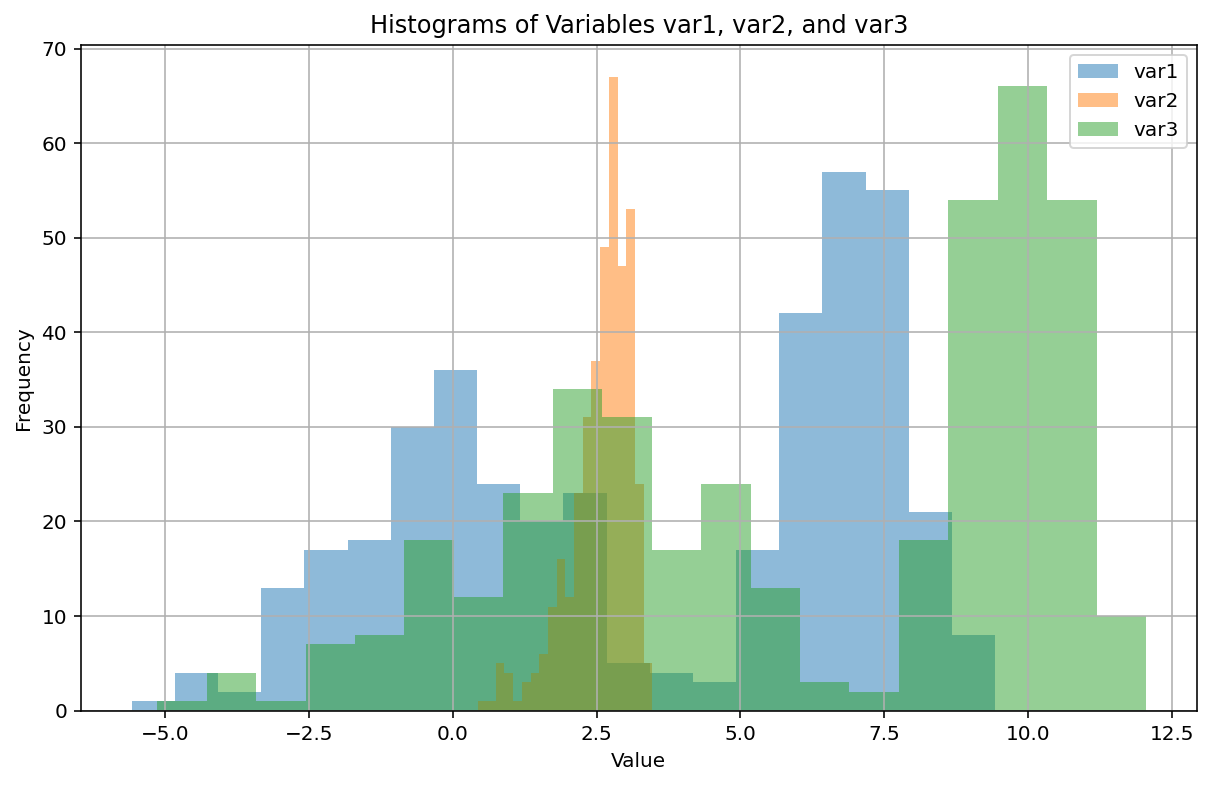

In [12]:
# Plot 4: Histograms of variables var1, var2, and var3

# Creating a figure for the plot with a specified size
plt.figure(figsize=(10, 6), dpi=144)

# Plotting histograms for var1, var2, and var3 with 20 bins each
plt.hist(data['var1'], bins=20, alpha=0.5, label='var1')  # Histogram for var1
plt.hist(data['var2'], bins=20, alpha=0.5, label='var2')  # Histogram for var2
plt.hist(data['var3'], bins=20, alpha=0.5, label='var3')  # Histogram for var3

# Adding a title to the plot
plt.title('Histograms of Variables var1, var2, and var3')

# Labeling x-axis
plt.xlabel('Value')

# Labeling y-axis
plt.ylabel('Frequency')

# Adding a legend to distinguish between var1, var2, and var3
plt.legend()

# Displaying grid lines on the plot
plt.grid(True)

# Showing the plot
plt.show()

<Figure size 1440x864 with 0 Axes>

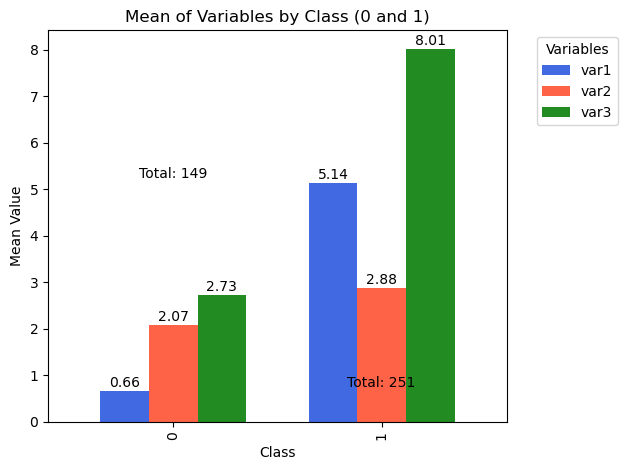

In [17]:
# Plot 5: Mean of variables by class

# Calculate the mean of each variable for each class
mean_values = data.groupby('class').mean()

# Set up the figure and specify its size and resolution
plt.figure(figsize=(10, 6), dpi=144)

# Adjust width here
bars = mean_values.plot(kind='bar', color=['royalblue', 'tomato', 'forestgreen'], width=0.7)

# Add title and labels
plt.title('Mean of Variables by Class (0 and 1)')
plt.xlabel('Class')
plt.ylabel('Mean Value')

# Add legend
plt.legend(title='Variables', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add mean values on top of each bar
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, 
             f'{bar.get_height():.2f}', ha='center', va='bottom', color='black')

# Add total count of each class
class_counts = data['class'].value_counts()
plt.text(1, mean_values.iloc[0, 0] + 0.03, f'Total: {class_counts[1]}', ha='center', va='bottom', color='black')
plt.text(0, mean_values.iloc[1, 0] + 0.03, f'Total: {class_counts[0]}', ha='center', va='bottom', color='black')

# Display the plot
plt.tight_layout()
plt.show()

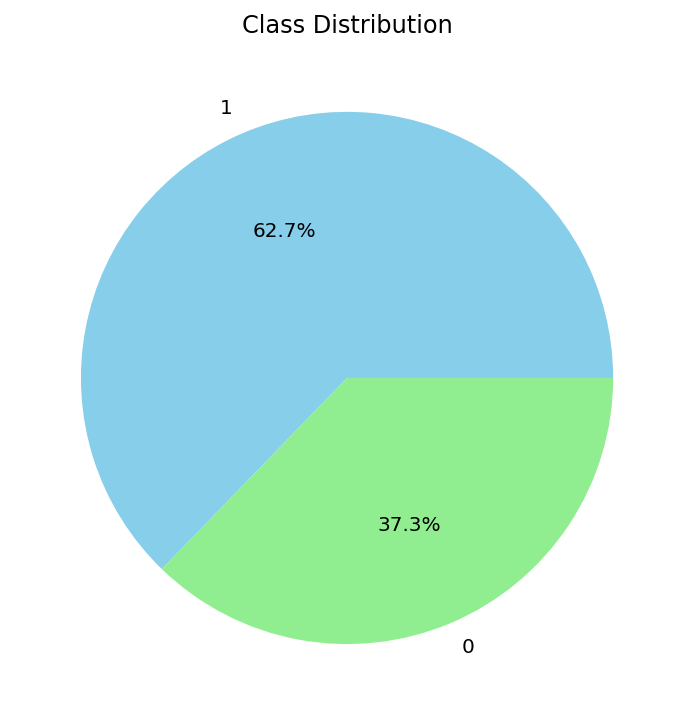

In [19]:
# Plot 6: pie chart showing the distribution of classes

# Calculate the total count of each class
class_counts = data['class'].value_counts()

# Set up the figure and specify its size and resolution
plt.figure(figsize=(10, 6), dpi=144)

# Plot a pie chart showing the distribution of classes
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])

# Add title
plt.title('Class Distribution')

# Display the plot
plt.show()

### THANK YOU